In [1]:
!pip install  keras numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:

X_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255.0

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

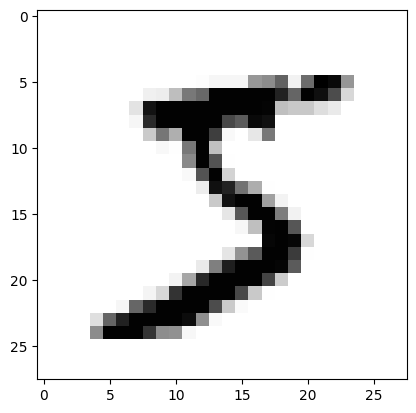

In [6]:
plt.imshow(x_train[0], cmap='Greys')

In [7]:
model = Sequential([
    # --- Bloc 1 (Simplifié) ---
    # Une seule convolution suffit pour commencer
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # --- Bloc 2 (Simplifié) ---
    # On passe à 64 filtres, mais on reste simple
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), # Utile pour généraliser

    # --- (Le Bloc 3 a été supprimé car inutile pour MNIST et trop lourd pour le CPU) ---

    # --- Couches denses ---
    Flatten(),
    # 64 ou 128 neurones suffisent largement (au lieu de 256)
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Afficher le résumé du modèle (Vous verrez beaucoup moins de paramètres)
model.summary()

C:\Users\mohamed\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train, y_train,
    batch_size=512,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

model.save('model.h5')

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 163ms/step - accuracy: 0.8069 - loss: 0.6132 - val_accuracy: 0.9625 - val_loss: 0.1273
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 182ms/step - accuracy: 0.9520 - loss: 0.1630 - val_accuracy: 0.9760 - val_loss: 0.0798
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.9664 - loss: 0.1126 - val_accuracy: 0.9822 - val_loss: 0.0625
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.9711 - loss: 0.0946 - val_accuracy: 0.9849 - val_loss: 0.0517
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 166ms/step - accuracy: 0.9763 - loss: 0.0784 - val_accuracy: 0.9866 - val_loss: 0.0439
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.9790 - loss: 0.0689 - val_accuracy: 0.9871 - val_loss: 0.0453
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - accuracy: 0.9808 - loss: 0.0618 - val_accuracy: 0.9878 - val_loss: 0.0399
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accu

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nPrécision sur le jeu de test: {test_accuracy*100:.2f}%")





Précision sur le jeu de test: 99.23%


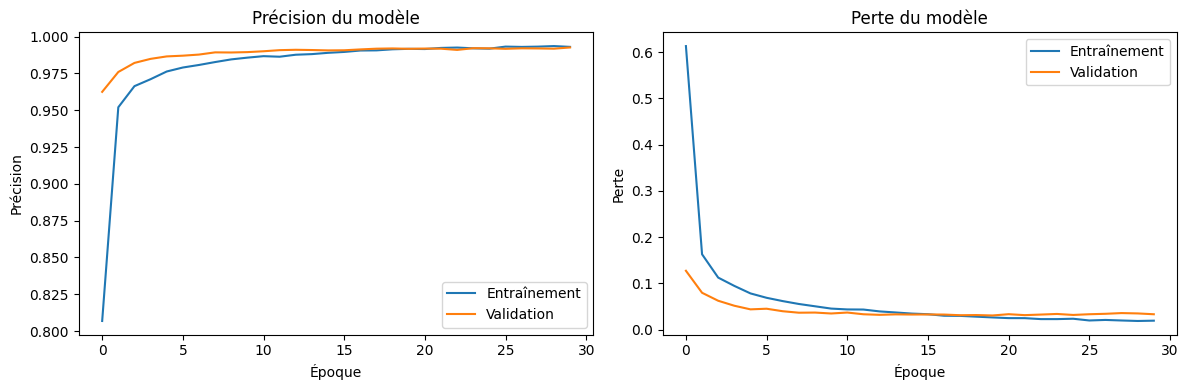

In [10]:
# Affichage des graphiques
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Précision du modèle')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte du modèle')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

print("\nPrédictions vs Vraies valeurs:")
print("Prédictions:", predicted_classes)
print("Vraies valeurs:", true_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

Prédictions vs Vraies valeurs:
Prédictions: [7 2 1 0 4 1 4 9 5 9]
Vraies valeurs: [7 2 1 0 4 1 4 9 5 9]


In [ ]:
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np

class ModernGUI:
    def __init__(self, root, model):
        self.root = root
        self.model = model
        self.root.title("MNIST Handwriting Recognizer")
        self.root.geometry("650x400")
        self.root.resizable(False, False)
        
        # --- COULEURS (Style Dark Mode comme sur la photo) ---
        self.bg_color = "#2b3e50"       # Gris/Bleu foncé
        self.text_color = "#f1c40f"     # Jaune doré
        self.btn_rec_color = "#27ae60"  # Vert
        self.btn_clr_color = "#c0392b"  # Rouge
        self.canvas_bg = "white"
        
        self.root.configure(bg=self.bg_color)

        # --- MEMOIRE IMAGE ---
        self.image = Image.new("L", (300, 300), 255)
        self.draw = ImageDraw.Draw(self.image)

        # --- LAYOUT (Cadres Gauche et Droite) ---
        self.left_frame = tk.Frame(root, bg=self.bg_color)
        self.left_frame.pack(side=tk.LEFT, padx=20, pady=20)
        
        self.right_frame = tk.Frame(root, bg=self.bg_color)
        self.right_frame.pack(side=tk.RIGHT, padx=20, pady=20, fill=tk.BOTH, expand=True)

        # --- GAUCHE : ZONE DE DESSIN ---
        self.canvas = tk.Canvas(self.left_frame, width=300, height=300, bg=self.canvas_bg, cursor="cross")
        self.canvas.pack()
        self.canvas.bind("<B1-Motion>", self.paint)

        # --- DROITE : RESULTATS ET BOUTONS ---
        
        # Label "Digit: ..."
        self.label_digit = tk.Label(self.right_frame, text="Digit: ?", 
                                    font=("Helvetica", 28, "bold"), 
                                    bg=self.bg_color, fg=self.text_color)
        self.label_digit.pack(pady=(40, 10))

        # Label "Accuracy: ..."
        self.label_acc = tk.Label(self.right_frame, text="Accuracy: 0%", 
                                  font=("Helvetica", 18), 
                                  bg=self.bg_color, fg=self.text_color)
        self.label_acc.pack(pady=(0, 40))

        # Bouton RECOGNIZE (Vert)
        self.btn_recognize = tk.Button(self.right_frame, text="Recognize", command=self.predict_digit,
                                       font=("Helvetica", 14, "bold"), bg=self.btn_rec_color, fg="white",
                                       width=12, height=1, relief=tk.RAISED, bd=3)
        self.btn_recognize.pack(pady=10)

        # Bouton CLEAR (Rouge)
        self.btn_clear = tk.Button(self.right_frame, text="Clear", command=self.clear,
                                   font=("Helvetica", 14, "bold"), bg=self.btn_clr_color, fg="white",
                                   width=10, height=1, relief=tk.RAISED, bd=3)
        self.btn_clear.pack(pady=10)

    def paint(self, event):
        # Pinceau plus gros et plus doux pour ressembler à l'image
        r = 12 
        x1, y1 = (event.x - r), (event.y - r)
        x2, y2 = (event.x + r), (event.y + r)
        self.canvas.create_oval(x1, y1, x2, y2, fill='black', outline='black')
        self.draw.ellipse([x1, y1, x2, y2], fill=0)

    def clear(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (300, 300), 255)
        self.draw = ImageDraw.Draw(self.image)
        self.label_digit.config(text="Digit: ?")
        self.label_acc.config(text="Accuracy: 0%")

    def predict_digit(self):
        # 1. Redimensionner
        img_resized = self.image.resize((28, 28))
        # 2. Inverser (Blanc sur Noir comme MNIST)
        img_inverted = ImageOps.invert(img_resized)
        # 3. Normaliser
        img_array = np.array(img_inverted) / 255.0
        # 4. Reshape
        img_final = img_array.reshape(1, 28, 28, 1)
        
        # 5. Prédiction
        pred = self.model.predict(img_final)
        digit = np.argmax(pred)
        accuracy = int(np.max(pred) * 100) # Pourcentage

        # 6. Mise à jour de l'affichage
        self.label_digit.config(text=f"Digit: {digit}")
        self.label_acc.config(text=f"Accuracy: {accuracy}%")

# Lancement de l'interface
root = tk.Tk()
# On passe 'model' (votre modèle entraîné) à l'interface
app = ModernGUI(root, model) 
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━